# DDRTree

**Created**: 19 November 2021

## Environment

In [1]:
if (!requireNamespace("viridis")) {
    install.packages("viridis")
}

if (!requireNamespace("DDRTree")) {
    install.packages("DDRTree")
}

if (!requireNamespace("dequer")) {
    install.packages("dequer")
}

if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

if (!requireNamespace("Rcpp")) {
    install.packages("Rcpp")
}

Loading required namespace: viridis

Loading required namespace: DDRTree

Loading required namespace: dequer

Loading required namespace: patchwork



In [2]:
library(tidyverse)
library(viridis)
library(RColorBrewer)
library(DDRTree)
library(dequer)
library(patchwork)
library(Rcpp)

setwd("~/eQTL_pQTL_Characterization/")

source("04_Expression/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite

Loading required package: irlba

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘dequer’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:utils’

## Load Data

In [10]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")

rownames(gene.exp) <- gsub("^GA", "", rownames(gene.exp))

In [11]:
head(gene.exp)

,UK02270173_3,UK15130120_3,UK58000006_3,UK47010004_3,UK42020088_5,UK47490007_3,UK02770164_3,UK02770164_5,UK02630151_3,UK42150107_1,⋯,UK59070043_3,UK59070043_5,UK02510223_3,UK02XX0336_5,UK29090086_3,UK02XX0335_1,UK02XX0334_3,UK01210130_3,UK01210130_5,UK01380125_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000230521,0.6644339,0.58271604,0.4046756,0.20905157,0.2211571,0.4288519,0.5133516,0.57768877,0.6990766,0.3812037,⋯,0.3823184,0.5423684,0.86762630,0.73833461,0.6461583,0.1227063,0.9621386,0.65838459,1.03561474,0.4457301
ENSG00000225864,0.9817872,0.43879936,0.6022344,0.92340489,0.2211571,1.1450686,0.1921362,0.57768877,0.1974851,1.2290495,⋯,0.6842527,0.8539227,0.91886777,0.12581620,0.5511865,0.4384007,0.5465139,0.40803066,0.46899151,0.3544115
ENSG00000227766,1.2117156,0.30682669,0.6625010,0.79963286,0.6445686,0.3130290,0.1183231,0.16750450,0.1505900,1.0533199,⋯,0.4901384,0.4340781,0.37504164,0.04316943,0.6151905,0.3406488,0.3147798,0.43511377,0.17382742,0.1157514
ENSG00000237669,0.6420763,0.69256830,0.9792012,0.69929584,0.3765156,1.0756817,0.8912050,0.60129641,0.8534668,1.0533199,⋯,1.0790156,0.6102946,1.03953331,0.97965846,0.7061683,0.7489857,0.7919934,0.85168813,0.69120049,1.0798771
ENSG00000271581,2.4744895,1.33153140,1.8310464,2.47531701,1.8812042,2.0531366,0.5972544,1.00686213,1.2811361,2.4244938,⋯,2.4728831,1.5338898,1.59080138,0.62923925,1.2804253,1.4727511,1.2187650,1.46471386,1.44139443,1.1896250
ENSG00000285647,0.0000000,0.03379072,0.0000000,0.05517067,0.6748270,0.0000000,0.0000000,0.03509293,0.6990766,1.6556266,⋯,3.4117627,2.4012963,0.04682116,0.00000000,0.0000000,0.4695662,0.3762952,0.07078527,0.07206309,0.4159282


In [12]:
eigengenes <- read.csv("~/gains_team282/nikhil/expression/gene_expression/eigengenes.csv", row.names=1)

In [14]:
head(eigengenes)

,ME_1,ME_2,ME_3,ME_4,ME_5,ME_6,ME_7,ME_8,ME_9,ME_10,⋯,ME_97,ME_98,ME_99,ME_100,ME_101,ME_102,ME_103,ME_104,ME_105,ME_106
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,0.008640296,0.007926439,0.0147219682,-0.011774847,0.029042358,-0.006588595,-0.004034583,-0.013647582,0.020445938,0.03657146,⋯,0.105461618,0.014671996,-0.03186240,-0.019044546,-0.001067989,0.03791366,0.008340969,-0.002505741,0.033258706,-0.003317747
UK15130120_3,-0.037073495,-0.033179470,-0.0311931107,-0.006189163,0.039065099,-0.011809051,0.037283445,-0.060021257,-0.036280957,0.03133065,⋯,-0.006444524,-0.019642856,0.01880373,-0.044684726,-0.043663066,-0.02550290,0.031624201,-0.011931533,0.051184001,-0.012327128
UK58000006_3,0.029670524,0.021490110,0.0369543066,-0.015010027,-0.004745170,0.023133390,-0.027585817,0.010804862,0.044649369,-0.01014143,⋯,0.085257258,-0.006499496,-0.01582150,0.030709065,0.040952839,0.04332857,-0.003376643,0.012633897,-0.006622840,-0.004740631
UK47010004_3,0.011954974,0.007360515,0.0073725862,-0.011608271,-0.011341294,-0.025127169,-0.009500677,0.013387153,0.007126337,-0.02607067,⋯,0.075920669,-0.016223383,0.02515734,-0.008023902,0.018023055,-0.01461801,0.010948287,0.023381207,-0.003072117,0.012014706
UK42020088_5,0.009818957,0.008322535,0.0004121376,-0.008882007,-0.028000468,0.002082996,-0.009532910,0.011477800,-0.001521594,-0.02223628,⋯,0.035896079,0.009274050,0.03406072,-0.005459722,0.037120618,-0.01089588,-0.008355454,-0.034402696,-0.032697222,0.007915598
UK47490007_3,-0.021930377,-0.024756322,-0.0294342468,-0.007742353,-0.005486842,-0.049842615,0.020825112,0.007441717,-0.030615907,-0.01853294,⋯,0.092538453,0.067616309,0.02790283,-0.036887001,-0.017742254,0.01562787,0.026717734,-0.009877409,-0.003607270,0.024871961


In [15]:
sample.info <- read.table("/nfs/team282/data/gains_team282/Sample_info_864.txt") %>%
    dplyr::mutate(supplier_name=gsub("^GA", "", supplier_name)) %>%
    dplyr::filter(supplier_name %in% rownames(eigengenes))

rownames(sample.info) <- sample.info$supplier_name
sample.info <- sample.info[rownames(eigengenes),]

In [16]:
head(sample.info)

,manual_qc,id_study_lims,name,description,sanger_sample_id,supplier_name,last_updated,id_library_lims,id_pool_lims,id_iseq_flowcell_tmp,⋯,TIN.mean.,TIN.median.,TIN.stdev.,Concentration,num_samples_per_lane,SRSUnsup,globin_rate_fromcounts,PCOutlier,OtherOutlier,GAinSID
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<lgl>,<chr>
UK02270173_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032857,UK02270173_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930558,⋯,69.51307,76.82800,23.72743,116.731,77,2,0.6790401,FALSE,FALSE,UK02270173
UK15130120_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032858,UK15130120_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930559,⋯,65.03706,71.49895,24.13243,76.185,77,2,0.6826886,FALSE,FALSE,UK15130120
UK58000006_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032859,UK58000006_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930560,⋯,70.85535,78.07773,23.24183,59.767,77,2,1.4290063,FALSE,FALSE,UK58000006
UK47010004_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032860,UK47010004_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930561,⋯,68.16224,75.05450,23.56361,105.000,77,1,0.9177558,FALSE,FALSE,UK47010004
UK42020088_5,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032861,UK42020088_5,2019-09-30 21:01:38,DN548016D,NT1557159B,6930562,⋯,64.67378,72.53810,26.03766,87.843,77,1,0.4031685,FALSE,FALSE,UK42020088
UK47490007_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032862,UK47490007_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930563,⋯,62.79935,68.60305,24.27960,67.484,77,2,1.1993500,FALSE,FALSE,UK47490007


In [17]:
associations <- read.csv("~/gains_team282/nikhil/expression/gene_expression/estimates.all.csv")

head(associations)

,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ME_5,Neutrophils,Cell Proportion,-0.7059511,Rho,6.353363e-127,2.020369e-124
2,ME_37,Neutrophils,Cell Proportion,-0.6988544,Rho,2.328130e-123,3.701727e-121
3,ME_26,Neutrophils,Cell Proportion,-0.6917732,Rho,6.606400e-120,7.002784e-118
4,ME_48,Lymphocytes,Cell Proportion,0.6825532,Rho,1.474682e-115,1.172372e-113
5,ME_5,Lymphocytes,Cell Proportion,0.6774818,Rho,3.110145e-113,1.978052e-111
6,ME_20,Neutrophils,Cell Proportion,-0.6766120,Rho,7.703381e-113,4.082792e-111


## DDRTree Algorithm

DDRTree is a dimensionality reduction algorithm used by Monocle2 on single-cell data. However, the dimensionality reduction technique is [broadly applicable](https://dl.acm.org/doi/10.1145/2783258.2783309). The algorithm assumes an underlying tree structure for the data. It performs a soft clustering of the data on $K$ centroids where $K<N$. A tree is then learned on these $K$ centroids.

This algorithm is implemented in the `DDRTree` R package. The algorithm returns the following variables:

1. $\mathbf{Z} \in \mathbb{R}_{d\times N}$ - A matrix of $N$ points representing the samples in the latent graph space.
2. $\mathbf{Y} \in \mathbb{R}_{d\times K}$ - A matrix of $K$ centroids in the latent graph space.
3. $\mathbf{W} \in \mathbb{R}_{D\times d}$ - A matrix of orthogonal, $d$-dimensional vectors representing a mapping from the latent space (lower-dimensional graph space) to the higher-dimensional input space. That is, the algorithm learns a function $f(z_i) = \mathbf{W}z_i$ such that $f: \mathbb{R}^d \rightarrow \mathbb{R}^D$.
4. `stree` $\in \mathbb{R}_{K\times K}$ - A sparse matrix representing the adjacency matrix of the tree over the centroids $\mathbf{Y}$.

In this analysis, I ran DDRTree on both the full gene expression data and the eigengene expression data. I also use a subset of eigengenes specifically associated with time point. By default, the DDRTree algorithm assumes that $K=N$, thus creating a tree on $N$ vertices.

**Objective**

$$\min_{\mathbf{W},\mathbf{Z}, \mathbf{B}, \mathbf{Y}, \mathbf{R}} \sum_{i=1}^N || \mathbf{x}_i - \mathbf{W}\mathbf{z}_i ||^2 + \frac{\lambda}{2} \sum_{k,k'} b_{k,k'} || \mathbf{W}\mathbf{y}_{k} - \mathbf{W}\mathbf{y}_{k'} ||^2 + \gamma \left[ \sum_{k=1}^K \sum_{i=1}^N r_{i,k} || \mathbf{z}_i - \mathbf{y}_k ||^2 + \sigma \Omega(\mathbf{R}) \right]$$

such that

$$\mathbf{W}^T \mathbf{W} = \mathbf{I}_{d}$$

$$\mathbf{B}\in\mathcal{B}$$

$$\sum_{k=1}^K r_{i,k} = 1\,\forall i$$

$$r_{i,k} \geq 0\,\forall i\,\forall k$$

$$\Omega(\mathbf{R})=\sum_{k=1}^K \sum_{i=1}^N r_{i,k}\log r_{i,k}$$

**Algorithm Hyperparameters**

1. $\lambda$ - Regularization parameter for inverse graph embedding. A higher value will reduce the distance between adjacent centroids on the graph.
2. $\gamma$ - Regularization parameter for the soft $K$-means. A higher value will create tighter clusters of samples.
3. $\sigma$ - "Bandwidth" parameter. A higher value will result in "harder" assignments of samples to clusters.

### Full Gene Expression

In [18]:
if (!file.exists("~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")) {
    
    ddr.tree.full <- DDRTree(
        as.matrix(gene.exp), dimensions=2, verbose=TRUE
    )
    
    rownames(ddr.tree.full$Z) <- c("Comp1", "Comp2")
    colnames(ddr.tree.full$Z) <- colnames(gene.exp)
    
    rownames(ddr.tree.full$Y) <- c("Comp1", "Comp2")
    colnames(ddr.tree.full$Y) <- paste0("Centroid", 1:ncol(gene.exp))
    
    rownames(ddr.tree.full$W) <- rownames(gene.exp)
    colnames(ddr.tree.full$W) <- c("Comp1", "Comp2")
    
    ddr.tree.full$tree <- as.data.frame(summary(ddr.tree.full$stree)) %>%
        dplyr::select(I=i, J=j) %>%
        dplyr::filter(I != J & I < J) %>%
        dplyr::arrange(I, J) %>%
        dplyr::mutate(Centroid.I = colnames(ddr.tree.full$Y)[I], Centroid.J = colnames(ddr.tree.full$Y)[J])

    saveRDS(ddr.tree.full, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")
    
} else {
    
    ddr.tree.full <- readRDS("~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")
}

### Eigengene Expression

In [19]:
ddr.tree.eigen <- DDRTree(
    as.matrix(t(eigengenes)), dimensions=2, verbose=FALSE, sigma=0.001, param.gamma=5
)

rownames(ddr.tree.eigen$Z) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen$Z) <- rownames(eigengenes)

rownames(ddr.tree.eigen$Y) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen$Y) <- paste0("Centroid", 1:nrow(eigengenes))

rownames(ddr.tree.eigen$W) <- colnames(eigengenes)
colnames(ddr.tree.eigen$W) <- c("Comp1", "Comp2")

ddr.tree.eigen$tree <- as.data.frame(summary(ddr.tree.eigen$stree)) %>%
    dplyr::select(I=i, J=j) %>%
    dplyr::filter(I != J & I < J) %>%
    dplyr::arrange(I, J) %>%
    dplyr::mutate(Centroid.I = colnames(ddr.tree.eigen$Y)[I], Centroid.J = colnames(ddr.tree.eigen$Y)[J])

saveRDS(ddr.tree.eigen, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigengenes.RDS")

### Eigengenes Associated with Time Point

In [20]:
time.point.eigens <- associations %>%
    dplyr::filter(Association.Variable.Type=="Time Point") %>%
    dplyr::arrange(desc(abs(Statistic))) %>%
    head(n=10)

time.point.eigengenes <- eigengenes[,time.point.eigens$Eigengene]

head(time.point.eigengenes)

,ME_44,ME_49,ME_75,ME_45,ME_8,ME_43,ME_18,ME_54,ME_51,ME_7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,-0.007475086,-0.017872160,0.013527722,-0.032653712,-0.013647582,0.014249015,-0.003964295,0.019082784,0.019336129,-0.004034583
UK15130120_3,-0.034015966,-0.036727023,0.031856629,-0.038368048,-0.060021257,-0.036845521,-0.037439923,-0.023112716,-0.033863567,0.037283445
UK58000006_3,-0.014957060,0.008030067,-0.016407640,-0.014895157,0.010804862,0.030754239,0.018698833,0.026896200,0.014013408,-0.027585817
UK47010004_3,0.036197342,0.017029146,0.005178269,0.012662904,0.013387153,0.018518012,0.001548713,-0.005126834,0.016329647,-0.009500677
UK42020088_5,0.032911302,0.018636061,-0.012526507,0.021998434,0.011477800,0.007567288,0.014696250,-0.026717869,0.016616081,-0.009532910
UK47490007_3,-0.014310734,-0.013272888,0.048740981,0.002494538,0.007441717,-0.012037576,-0.017159364,-0.033516242,-0.002880644,0.020825112


In [21]:
ddr.tree.eigen.time.point <- DDRTree(
    as.matrix(t(time.point.eigengenes)), dimensions=2, verbose=FALSE, sigma=0.001, param.gamma=2
)

rownames(ddr.tree.eigen.time.point$Z) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen.time.point$Z) <- rownames(time.point.eigengenes)

rownames(ddr.tree.eigen.time.point$Y) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen.time.point$Y) <- paste0("Centroid", 1:nrow(time.point.eigengenes))

rownames(ddr.tree.eigen.time.point$W) <- colnames(time.point.eigengenes)
colnames(ddr.tree.eigen.time.point$W) <- c("Comp1", "Comp2")

ddr.tree.eigen.time.point$tree <- as.data.frame(summary(ddr.tree.eigen.time.point$stree)) %>%
    dplyr::select(I=i, J=j) %>%
    dplyr::filter(I != J & I < J) %>%
    dplyr::arrange(I, J) %>%
    dplyr::mutate(Centroid.I = colnames(ddr.tree.eigen.time.point$Y)[I], Centroid.J = colnames(ddr.tree.eigen.time.point$Y)[J])

saveRDS(ddr.tree.eigen.time.point, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigengenes.time.point.RDS")

## Identify Branches of the Trees

The tree is a graph $G=(V,E)$ with a set of vertices $V$ and a set of undirected edges $E$. Based on the construction of the tree, we know that $|V|=K=N$. Furthermore, one of the property of trees is that $|E|=|V|-1$.

We can use a depth-first search (DFS) to identify branches in the tree. Without loss of generality, we can start at any leaf node $v^* \in V$ and traverse over the centroids. Each time we arrive at a branch point $v_i$ where $\deg(v_i)>2$, we will start assigning the vertices to a new branch.

In [22]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_dfs.cpp")

In [23]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.full$tree[,1:2]) - 1)

ddr.tree.full.branches <- cbind(as.data.frame(t(ddr.tree.full$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.full.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,9,NA
Centroid2,14,NA
Centroid3,1,NA
Centroid4,6,NA
Centroid5,1,NA
Centroid6,7,NA


In [24]:
saveRDS(ddr.tree.full.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.branches.RDS")

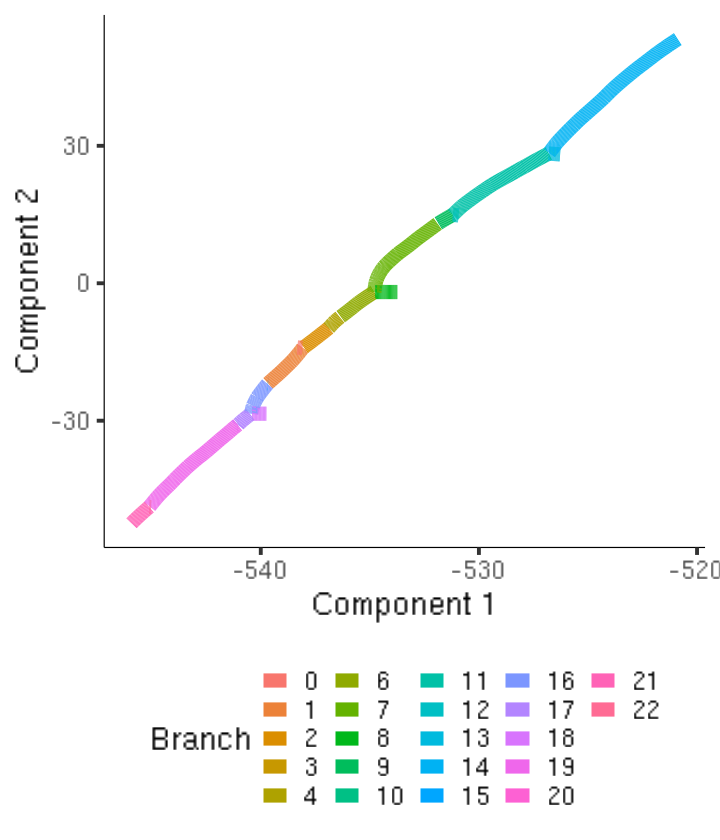

In [25]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.full$tree, t(ddr.tree.full$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.full$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.full.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(3)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_gene_expression_branch_assignment.svg", width=6, height=7)

In [26]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.eigen$tree[,1:2]) - 1)

ddr.tree.eigen.branches <- cbind(as.data.frame(t(ddr.tree.eigen$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.eigen.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,0,NA
Centroid2,10,NA
Centroid3,7,NA
Centroid4,6,NA
Centroid5,3,NA
Centroid6,3,NA


In [27]:
saveRDS(ddr.tree.eigen.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.branches.RDS")

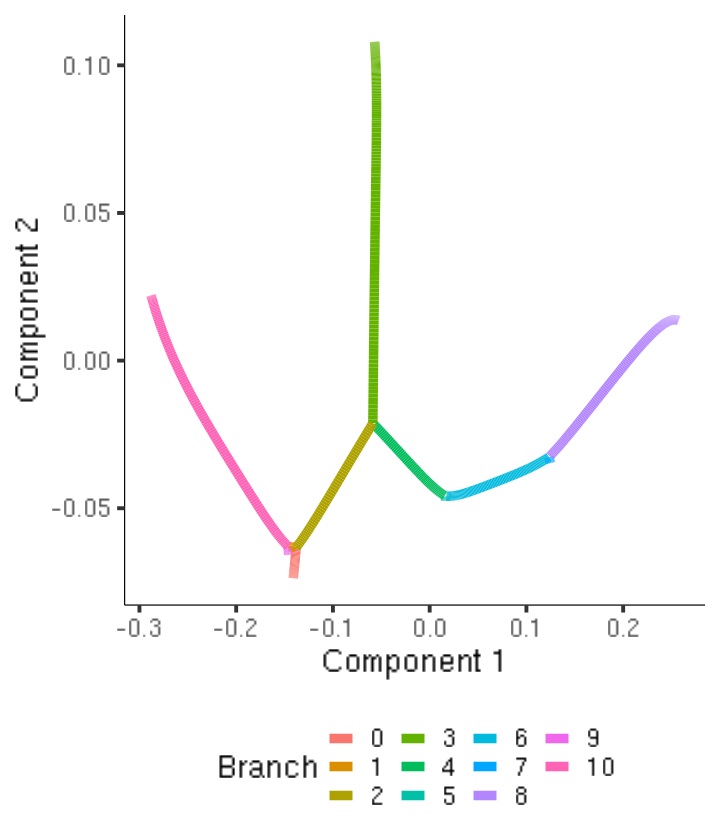

In [28]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.eigen$tree, t(ddr.tree.eigen$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.eigen.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(2)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_expression_branch_assignment.svg", width=6, height=7)

In [29]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.eigen.time.point$tree[,1:2]) - 1)

ddr.tree.eigen.time.point.branches <- cbind(as.data.frame(t(ddr.tree.eigen.time.point$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.eigen.time.point.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,2,NA
Centroid2,0,NA
Centroid3,5,NA
Centroid4,5,NA
Centroid5,5,NA
Centroid6,0,NA


In [30]:
saveRDS(ddr.tree.eigen.time.point.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.time.point.branches.RDS")

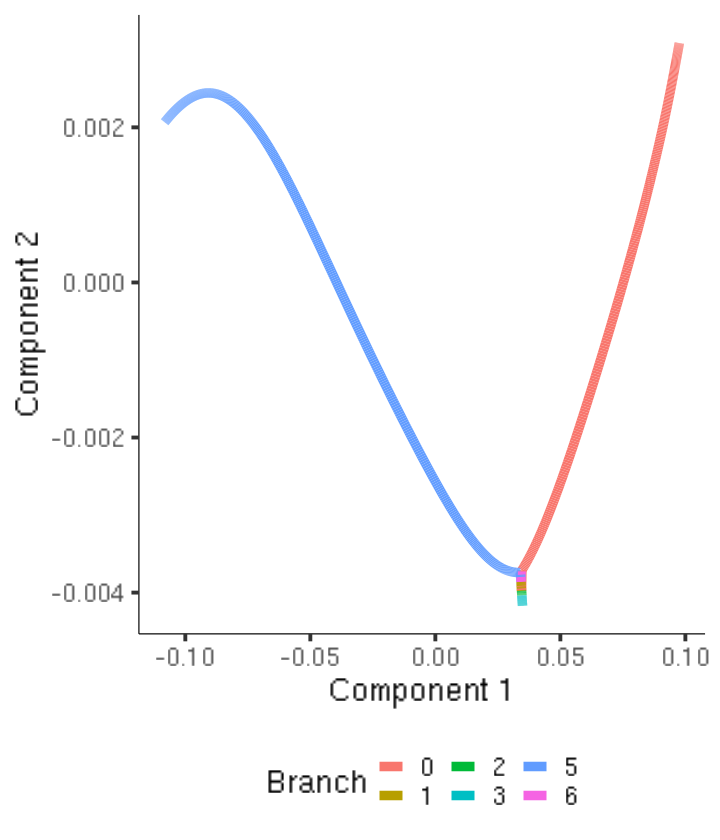

In [31]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.eigen.time.point$tree, t(ddr.tree.eigen.time.point$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen.time.point$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.eigen.time.point.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(2)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_time_point_expression_branch_assignment.svg", width=6, height=7)

## Project Samples onto Tree

The $i$-th sample in the data will have a latent position $\mathbf{z}_i$. By projecting this point onto the tree, we can start calculating pseudotimes and also assign each sample to a branch.

The projection for a given sample's latent position $\mathbf{z}$ works as follows:

1. Identify the line segment formed by the tree over $\mathbf{Y}$ that is closest to $\mathbf{z}$. Let this segment be defined by points $\mathbf{a},\mathbf{b}\in\mathbf{Y}$.

For each segment from $\mathbf{a}$ to $\mathbf{b}$, we can calculate the minimum distance $d$ from the point $\mathbf{z}$ to the segment as

$$t=\frac{(\mathbf{z} - \mathbf{a})\cdot (\mathbf{b} - \mathbf{a})}{|\mathbf{b} - \mathbf{a}|^2}$$

$$d=\begin{cases}
\frac{|(\mathbf{z} - \mathbf{a})\times (\mathbf{z} - \mathbf{b})|}{|\mathbf{b} - \mathbf{a}|} & 0\leq t \leq 1\\
\min \{ |\mathbf{a} - \mathbf{z}|, |\mathbf{b} - \mathbf{z}| \} & t < 0, t > 1
\end{cases}$$

2. Project the vector $\mathbf{z}-\mathbf{a}$ onto $\mathbf{b}-\mathbf{a}$. That is, the projected point $\mathbf{z}^*$ is

$$\mathbf{z}^* = \mathbf{a} + (\mathbf{b} - \mathbf{a})t$$

In [32]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_projection.cpp")

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [33]:
full.projected = tree_projection(ddr.tree.full$Z, ddr.tree.full$Y, as.matrix(ddr.tree.full$tree[,1:2]) - 1)
colnames(full.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

full.projected <- full.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.full.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.full.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(full.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-530.6542,17.282666,393,450,11
2,-523.6047,43.479674,38,224,14
3,-537.4814,-12.010961,171,207,2
4,-536.6827,-8.692998,111,384,4
5,-538.4937,-13.973361,777,785,0
6,-532.8301,9.675803,258,746,7


In [34]:
saveRDS(full.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.projected.RDS")

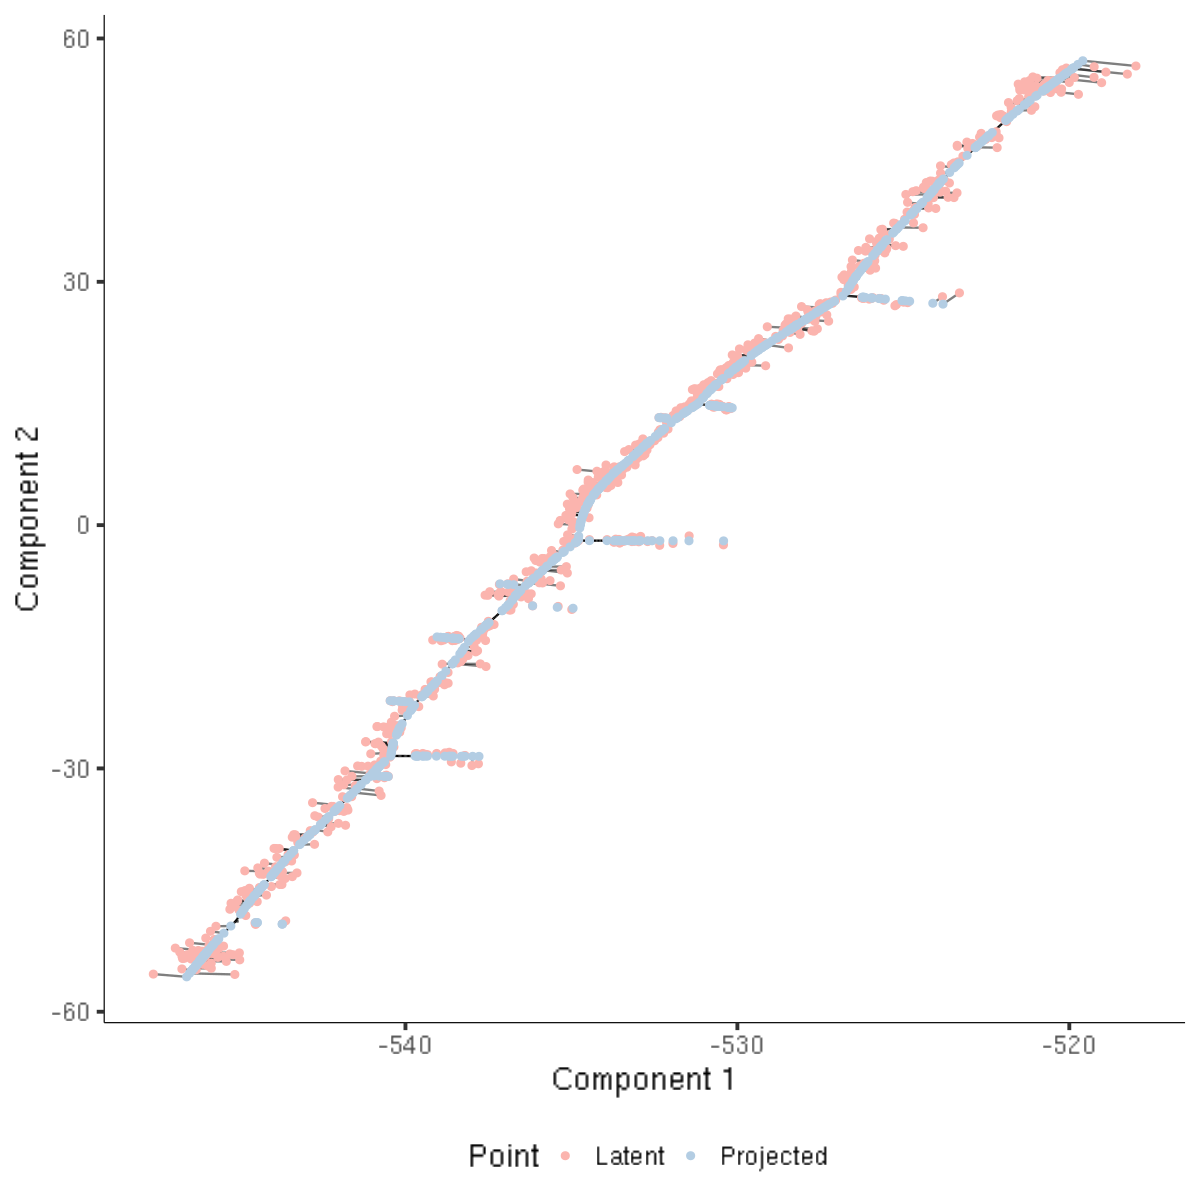

In [35]:
options(repr.plot.width=10, repr.plot.height=10)

tree.data <- merge(ddr.tree.full$tree, t(ddr.tree.full$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.full$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.full$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.full$Z)),
    full.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.full$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.5) +
    geom_point(aes(color=Point)) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_gene_expression_projected_samples.svg", width=10, height=10)

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [36]:
eigen.projected = tree_projection(ddr.tree.eigen$Z, ddr.tree.eigen$Y, as.matrix(ddr.tree.eigen$tree[,1:2]) - 1)
colnames(eigen.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

eigen.projected <- eigen.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.eigen.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.eigen.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(eigen.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.14019146,-0.071019134,7,209,0
2,-0.27118380,0.005644967,116,733,10
3,0.11490664,-0.034374336,620,700,6
4,0.11042801,-0.035183045,21,212,6
5,0.12701063,-0.031409684,543,662,8
6,-0.05703263,0.108737138,223,570,3


In [37]:
saveRDS(eigen.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.projected.RDS")

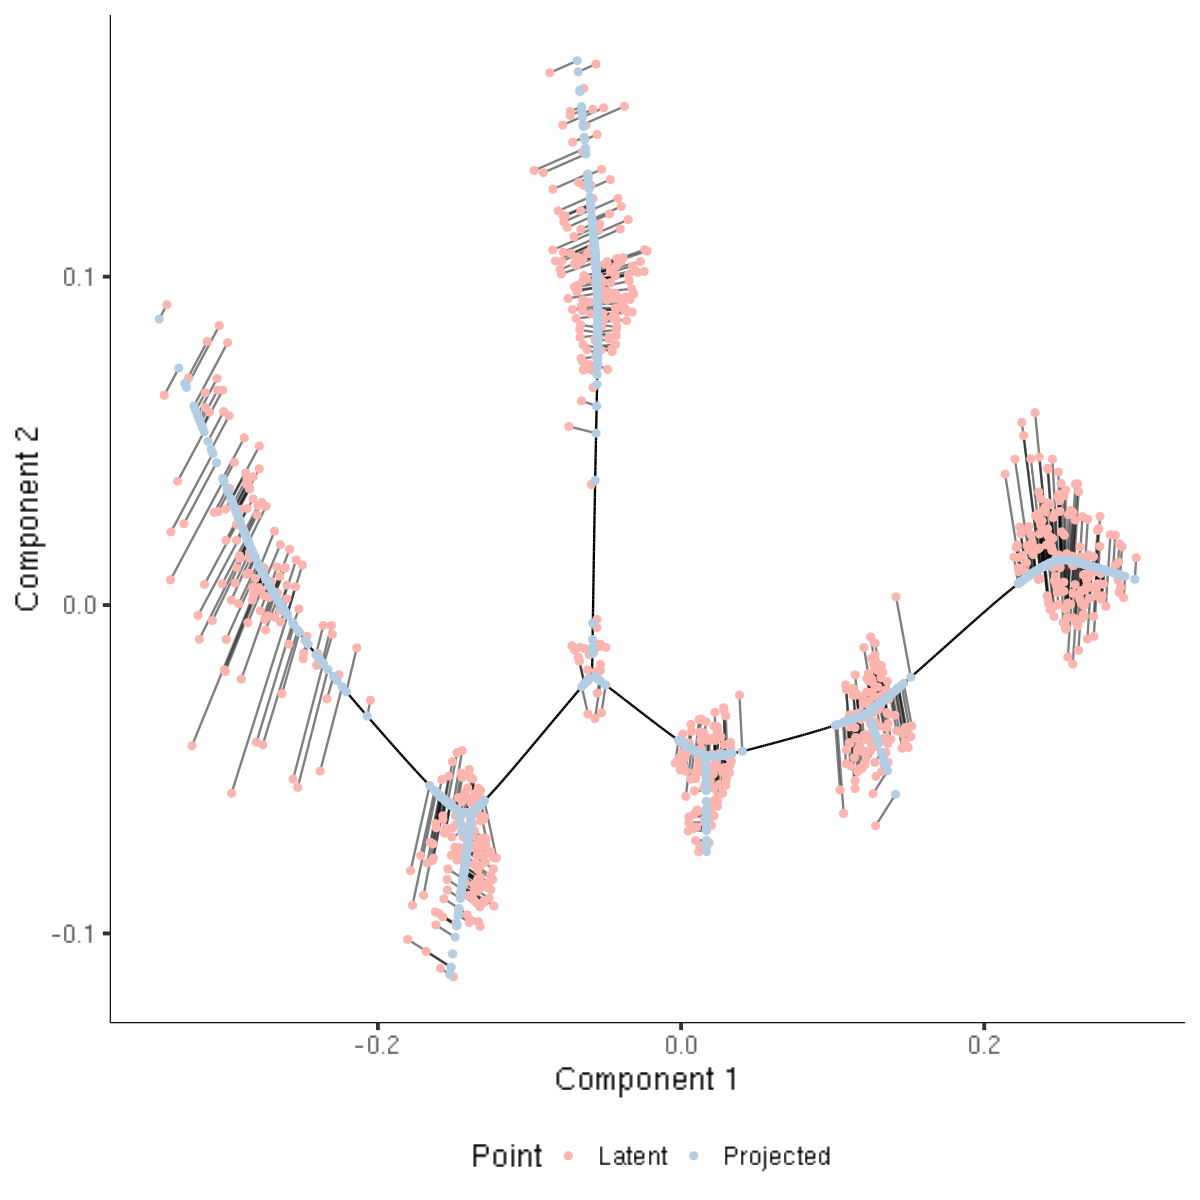

In [38]:
options(repr.plot.width=10, repr.plot.height=10)

tree.data <- merge(ddr.tree.eigen$tree, t(ddr.tree.eigen$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.eigen$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen$Z)),
    eigen.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.5) +
    geom_point(aes(color=Point)) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_expression_projected_samples.svg", width=10, height=10)

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [39]:
eigen.time.point.projected = tree_projection(ddr.tree.eigen.time.point$Z, ddr.tree.eigen.time.point$Y, as.matrix(ddr.tree.eigen.time.point$tree[,1:2]) - 1)
colnames(eigen.time.point.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

eigen.time.point.projected <- eigen.time.point.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.eigen.time.point.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.eigen.time.point.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(eigen.time.point.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02300545,-3.606859e-03,684,801,5
2,0.09453350,2.559050e-03,216,336,0
3,-0.03880362,-5.015469e-05,14,69,5
4,-0.04314585,2.506447e-04,510,527,5
5,-0.04682437,5.044571e-04,45,181,5
6,0.04799197,-2.765178e-03,381,486,0


In [40]:
saveRDS(eigen.time.point.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.time.point.projected.RDS")

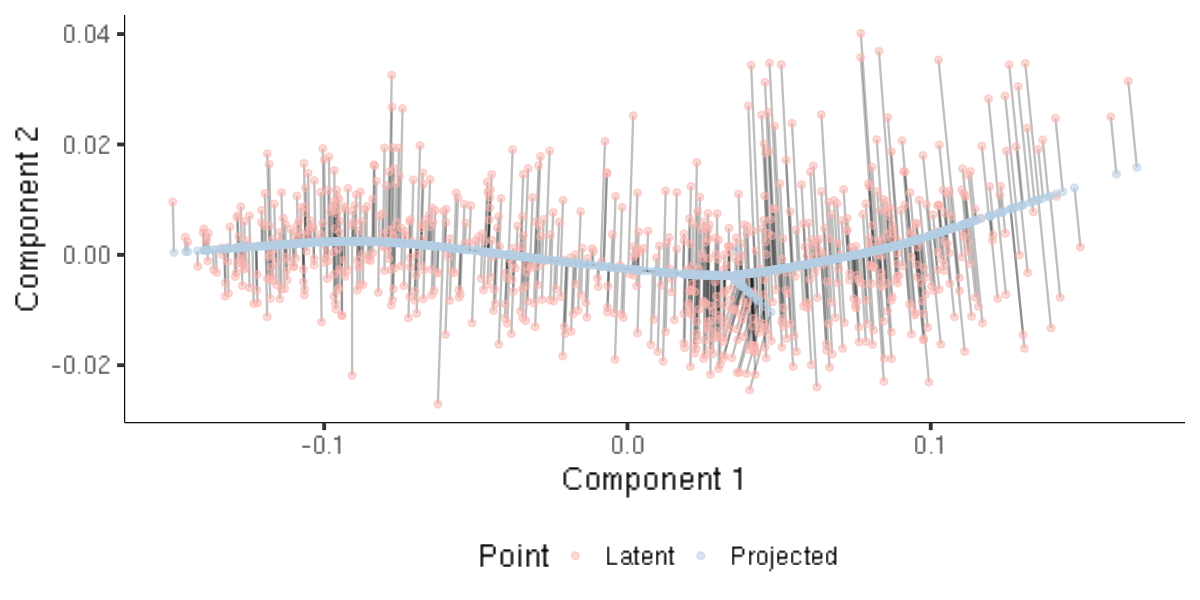

In [41]:
options(repr.plot.width=10, repr.plot.height=5)

tree.data <- merge(ddr.tree.eigen.time.point$tree, t(ddr.tree.eigen.time.point$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen.time.point$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.eigen.time.point$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen.time.point$Z)),
    eigen.time.point.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen.time.point$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.25) +
    geom_point(aes(color=Point), alpha=0.5) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_time_point_expression_projected_samples.svg", width=10, height=10)

## Calculate Pseudotime

Identify a Minimum Spanning Tree (MST) on the Projected Points using Kruskal's Algorithm. Choose a root node. Perform a DFS from the root node, accruing the distances between projected points to assign pseudotime.

In [42]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_pseudotime.cpp")

In [43]:
projected.distances <- as.matrix(dist(eigen.time.point.projected[,c("Proj.Comp1", "Proj.Comp2")]))

In [44]:
root.node <- which(eigen.time.point.projected$Proj.Comp1 == min(eigen.time.point.projected$Proj.Comp1)) - 1

In [45]:
pseudotime = tree_pseudotime(projected.distances, root.node)

In [46]:
pseudotime.mtx <- as.matrix(pseudotime)
rownames(pseudotime.mtx) <- rownames(eigengenes)
colnames(pseudotime.mtx) <- c("Pseudotime")

In [47]:
saveRDS(pseudotime.mtx, "~/gains_team282/nikhil/expression/gene_expression/eigen.time.point.pseudotime.RDS")

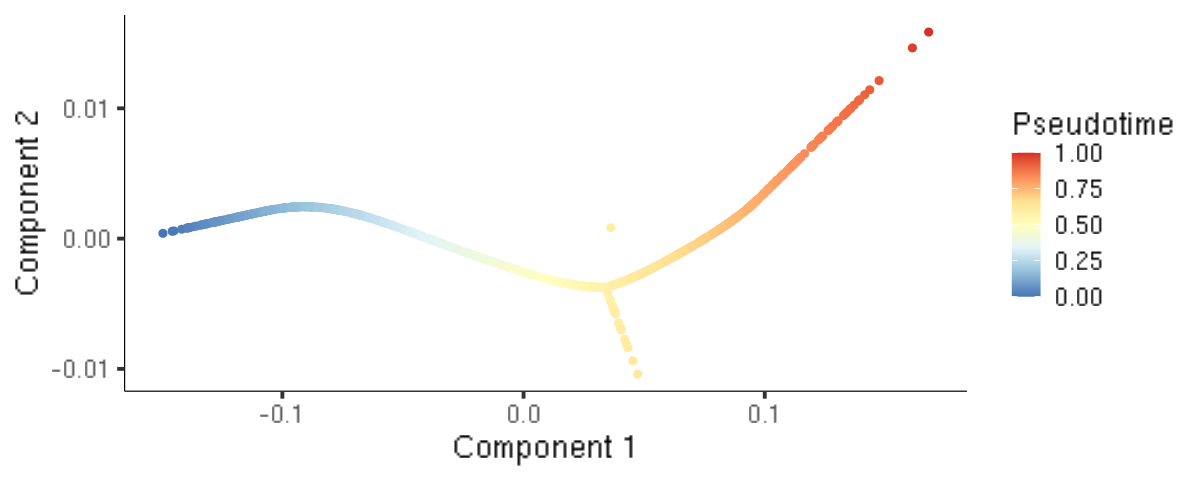

In [48]:
options(repr.plot.width=10, repr.plot.height=4)
cbind(eigen.time.point.projected, pseudotime.mtx) %>%
    as.data.frame() %>%
    ggplot() +
    geom_point(aes(x=Proj.Comp1, y=Proj.Comp2, color=Pseudotime)) +
    scale_color_distiller(palette="RdYlBu") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme +
    theme(legend.position="right")
ggsave("04_Expression/results/ddrtree_eigengene_trajectory_pseudotime.svg", width=10, height=4)